In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import shutil
from datetime import datetime
import tensorflow as tf
import keras
import ftplib

/home/rajarshi/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rajarshi/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rajarshi/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rajarshi/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

# State Data

In [2]:
api_url_data = 'https://api.covid19india.org/data.json'
r_data = requests.get(api_url_data)
data_time_series = r_data.json()

In [3]:
data_time_series.keys()

dict_keys(['cases_time_series', 'statewise', 'tested'])

In [4]:
state_data = data_time_series.get('statewise')

In [5]:
state_list = []
confirmed_list = []
recovered_list = []
deaths_list = []

deltaconfirmed_list = []
deltarecovered_list = []
deltadeaths_list = []

lastupdatedtime_list = []


for j in range(len(state_data)):
    state = state_data[j].get('state')
    
    confirmed = state_data[j].get('confirmed')        
    recovered = state_data[j].get('recovered')
    deaths = state_data[j].get('deaths')
    
    deltaconfirmed = state_data[j].get('deltaconfirmed')
    deltarecovered = state_data[j].get('deltarecovered')
    deltadeaths = state_data[j].get('deltadeaths')
    
    lastupdatedtime = state_data[j].get('lastupdatedtime')
    lastupdatedtime = lastupdatedtime[:-9]
    
    
    if confirmed != '0':
        state_list.append(state)
        
        confirmed_list.append(confirmed)
        recovered_list.append(recovered)
        deaths_list.append(deaths)
        
        deltaconfirmed_list.append(deltaconfirmed)
        deltarecovered_list.append(deltarecovered)
        deltadeaths_list.append(deltadeaths)

        lastupdatedtime_list.append(lastupdatedtime)

In [6]:
confirmed_list = np.array(confirmed_list, dtype = int)
recovered_list = np.array(recovered_list, dtype = int)
deaths_list = np.array(deaths_list, dtype = int)

active = np.subtract(confirmed_list, np.add(recovered_list, deaths_list))
death_rate = np.divide(deaths_list, confirmed_list)*100
recovery_rate = np.divide(recovered_list, confirmed_list)*100

death_rate_list = []
recovery_rate_list = []

for s in death_rate:
    s = round(s,1)
    death_rate_list = np.append(death_rate_list, s)
for p in recovery_rate:
    p = round(p,1)
    recovery_rate_list = np.append(recovery_rate_list, p)

In [7]:
state_data = {'State':state_list[1:],'Confirmed':confirmed_list[1:], 'Active':active[1:], 'Recovered':recovered_list[1:], 'Deaths':deaths_list[1:], 'Recovery Rate(%)':recovery_rate_list[1:], 'Death Rate(%)':death_rate_list[1:], 'Last Updated':lastupdatedtime_list[1:]}
df_state_data = pd.DataFrame(state_data)
df_state_data.to_csv('State_data.csv')
df_state_data.to_html('State_data.html', border=0, justify = 'left', index = False, table_id = "state_data_table")
df_state_data

,State,Confirmed,Active,Recovered,Deaths,Recovery Rate(%),Death Rate(%),Last Updated
0,Maharashtra,6817,5559,957,301,14.0,4.4,24/04/2020
1,Delhi,2514,1604,857,53,34.1,2.1,24/04/2020
2,Gujarat,2815,2423,265,127,9.4,4.5,24/04/2020
3,Rajasthan,2034,1509,493,32,24.2,1.6,24/04/2020
4,Tamil Nadu,1755,867,866,22,49.3,1.3,24/04/2020
5,Madhya Pradesh,1846,1544,210,92,11.4,5.0,24/04/2020
6,Uttar Pradesh,1621,1370,226,25,13.9,1.5,24/04/2020
7,Telangana,983,667,291,25,29.6,2.5,25/04/2020
8,Andhra Pradesh,955,781,145,29,15.2,3.0,23/04/2020
9,Karnataka,474,304,152,18,32.1,3.8,24/04/2020


# Case Time Plot:

In [8]:
time = data_time_series.get('cases_time_series')

In [9]:
date_list = []
dailyconfirmed_list = []
dailydeceased_list = []
dailyrecovered_list = []

totalconfirmed_list = []
totaldeceased_list = []
totalrecovered_list = []
t = 0
for t in range(len(time)):
    
    date = time[t].get('date')
    date_list.append(date)
    
    dailyconfirmed = time[t].get('dailyconfirmed')
    dailyconfirmed_list.append(dailyconfirmed)
    
    dailydeceased = time[t].get('dailydeceased')
    dailydeceased_list.append(dailydeceased)
    
    dailyrecovered = time[t].get('dailyrecovered')
    dailyrecovered_list.append(dailyrecovered)
    
    totalconfirmed = time[t].get('totalconfirmed')
    totalconfirmed_list.append(totalconfirmed)
    
    totalrecovered = time[t].get('totalrecovered')
    totalrecovered_list.append(totalrecovered)
    
    totaldeceased = time[t].get('totaldeceased')
    totaldeceased_list.append(totaldeceased)

In [10]:
total_data = {'Confirmed':str(confirmed_list[0]) + ' (+' + str(deltaconfirmed_list[0]) + ')', 'Active':active[0], 'Recovered':str(recovered_list[0]) + ' (+' + str(deltarecovered_list[0]) + ')', 'Deaths':str(deaths_list[0]) + ' (+' + str(deltadeaths_list[0]) + ')', 'Recovery Rate(%)':recovery_rate_list[0], 'Death Rate(%)':death_rate_list[0]}
df_total_data = pd.DataFrame(total_data, index=[0])
df_total_data.to_csv('total_data.csv')
df_total_data.to_html('total_data.html', border=0, justify = 'center', index=False)
df_total_data

,Confirmed,Active,Recovered,Deaths,Recovery Rate(%),Death Rate(%)
0,24447 (+1408),18171,5496 (+484),780 (+59),22.5,3.2


In [11]:
day_range = 14

daily_data = {'Daily Confirmations':dailyconfirmed_list[-day_range:], 'Daily Recoveries':dailyrecovered_list[-day_range:], 'Daily Deaths':dailydeceased_list[-day_range:], 'Total Confirmations':totalconfirmed_list[-day_range:], 'Total Recoveries':totalrecovered_list[-day_range:], 'Total Deaths':totaldeceased_list[-day_range:]}
df_daily_data = pd.DataFrame(daily_data, index = [date_list[-day_range:]])
df_daily_data.to_csv('daily_data.csv')
df_daily_data.to_html('daily_data.html', border=0, justify = 'left')
df_daily_data

,Daily Confirmations,Daily Recoveries,Daily Deaths,Total Confirmations,Total Recoveries,Total Deaths
11 April,854,186,40,8452,972,289
12 April,758,114,42,9210,1086,331
13 April,1243,112,27,10453,1198,358
14 April,1031,167,37,11484,1365,395
15 April,886,144,27,12370,1509,422
16 April,1061,258,26,13431,1767,448
17 April,922,273,38,14353,2040,486
18 April,1371,426,35,15724,2466,521
19 April,1580,388,38,17304,2854,559
20 April,1239,419,33,18543,3273,592


In [12]:
totalconfirmed_list = np.array(totalconfirmed_list, dtype=int)
totalrecovered_list = np.array(totalrecovered_list, dtype=int)
totaldeceased_list = np.array(totaldeceased_list, dtype=int)

dailyconfirmed_list = np.array(dailyconfirmed_list, dtype=int)
dailyrecovered_list = np.array(dailyrecovered_list, dtype=int)
dailydeceased_list = np.array(dailydeceased_list, dtype=int)

In [13]:
date_list_splitted = []
for i in date_list:
    date_splitted = i[0:2]
    date_list_splitted.append(date_splitted)

Text(0.5, 0.91, "Real Time Trend analysis of Covid'19 in Non-Uniform Scale")

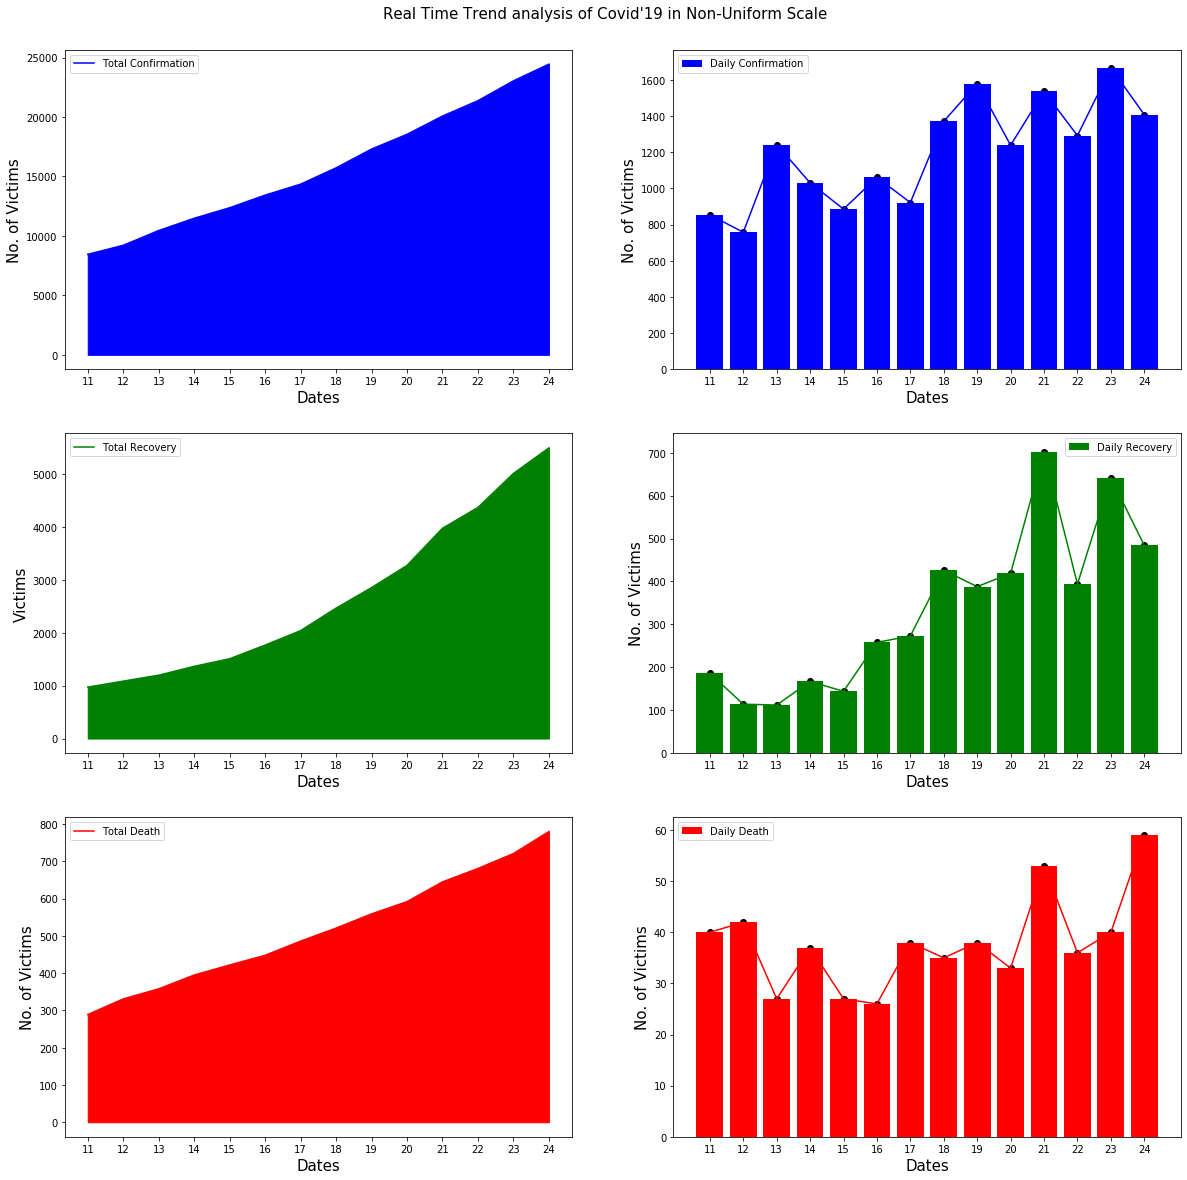

In [14]:
day_range = 14

plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
plt.plot(date_list_splitted[-day_range:], totalconfirmed_list[-day_range:], color='blue', label='Total Confirmation')
# plt.scatter(date_list_splitted[-day_range:], totalconfirmed_list[-day_range:], color='black')
plt.fill_between(date_list_splitted[-day_range:], totalconfirmed_list[-day_range:], color='blue')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('No. of Victims', fontsize=15)
plt.legend()

plt.subplot(3,2,2)
plt.bar(date_list_splitted[-day_range:], dailyconfirmed_list[-day_range:], color='blue', label='Daily Confirmation')
plt.plot(date_list_splitted[-day_range:], dailyconfirmed_list[-day_range:], color='blue')
plt.scatter(date_list_splitted[-day_range:], dailyconfirmed_list[-day_range:], color='black')
# plt.fill_between(date_list[-day_range:], dailyconfirmed_list[-day_range:], color='blue')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('No. of Victims', fontsize=15)
plt.legend()

plt.subplot(3,2,3)
plt.plot(date_list_splitted[-day_range:], totalrecovered_list[-day_range:], color='green', label='Total Recovery')
# plt.scatter(date_list_splitted[-day_range:], totalrecovered_list[-day_range:], color='black')
plt.fill_between(date_list_splitted[-day_range:], totalrecovered_list[-day_range:], color='green')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('Victims', fontsize=15)
plt.legend()

plt.subplot(3,2,4)
plt.bar(date_list_splitted[-day_range:], dailyrecovered_list[-day_range:], color='green', label='Daily Recovery')
plt.plot(date_list_splitted[-day_range:], dailyrecovered_list[-day_range:], color='green')
plt.scatter(date_list_splitted[-day_range:], dailyrecovered_list[-day_range:], color='black')
# plt.fill_between(date_list[-day_range:], dailyrecovered_list[-day_range:], color='green')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('No. of Victims', fontsize=15)
plt.legend()

plt.subplot(3,2,5)
plt.plot(date_list_splitted[-day_range:], totaldeceased_list[-day_range:], color='red', label='Total Death')
# plt.scatter(date_list_splitted[-day_range:], totaldeceased_list[-day_range:], color='black')
plt.fill_between(date_list_splitted[-day_range:], totaldeceased_list[-day_range:], color='red')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('No. of Victims', fontsize=15)
plt.legend()

plt.subplot(3,2,6)
plt.bar(date_list_splitted[-day_range:], dailydeceased_list[-day_range:], color='red', label='Daily Death')
plt.plot(date_list_splitted[-day_range:], dailydeceased_list[-day_range:], color='red')
plt.scatter(date_list_splitted[-day_range:], dailydeceased_list[-day_range:], color='black')
# plt.fill_between(date_list[-day_range:], dailydeceased_list[-day_range:], color='black')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('No. of Victims', fontsize=15)
plt.legend()

plt.suptitle("Real Time Trend analysis of Covid'19 in Non-Uniform Scale", fontsize=15, x=0.5,y=0.91)

In [15]:
x_conf = totalconfirmed_list[-15:]
x_rec = totalrecovered_list[-15:]
x_det = totaldeceased_list[-15:]

print(x_conf)
print(x_rec)
print(x_det)

print(len(x_conf))

[ 7598  8452  9210 10453 11484 12370 13431 14353 15724 17304 18543 20080
 21372 23039 24447]
[ 786  972 1086 1198 1365 1509 1767 2040 2466 2854 3273 3976 4370 5012
 5496]
[249 289 331 358 395 422 448 486 521 559 592 645 681 721 780]
15


Text(0.5, 1.0, 'Death')

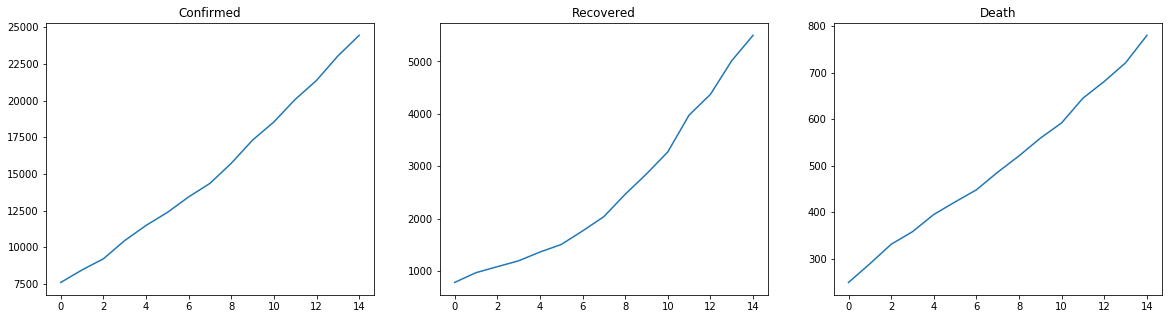

In [16]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot(x_conf)
plt.title('Confirmed')

plt.subplot(1,3,2)
plt.plot(x_rec)
plt.title('Recovered')

plt.subplot(1,3,3)
plt.plot(x_det)
plt.title('Death')

In [17]:
pd_pred_report = pd.read_csv('PRED_REPORTS.csv')
pd_pred_report

,Unnamed: 0,pred_list_conf,pred_list_rec,pred_list_det,conf_loss,rec_loss,det_loss
0,0,26365,6204,836,26761.992639,5233.801897,9.295211
1,1,26136,6414,812,23272.662036,4637.920306,6.178383
2,2,26226,6046,837,26991.537257,5471.435473,9.589619
3,3,26090,5950,829,27092.743886,5955.460954,6.885681
4,4,26769,5984,834,25836.679890,5285.038797,9.826468


In [18]:
pd_pred_list_conf = pd_pred_report['pred_list_conf'].values
pd_pred_list_rec = pd_pred_report['pred_list_rec'].values
pd_pred_list_det = pd_pred_report['pred_list_det'].values

pd_conf_loss = pd_pred_report['conf_loss'].values
pd_rec_loss = pd_pred_report['rec_loss'].values
pd_det_loss = pd_pred_report['det_loss'].values

In [19]:
i,j,k,l,m,n = 0,0,0,0,0,0

pred_list_conf = []
pred_list_rec = []
pred_list_det = []

conf_loss = []
rec_loss = []
det_loss = []

for i in pd_pred_list_conf:
    pred_list_conf.append(i)
    
for j in pd_pred_list_rec:
    pred_list_rec.append(j)
    
for k in pd_pred_list_det:
    pred_list_det.append(k)
    
for l in pd_conf_loss:
    conf_loss.append(l)
    
for m in pd_rec_loss:
    rec_loss.append(m)
    
for n in pd_det_loss:
    det_loss.append(n)

In [20]:
train = str(input("Do you want to train? "))

if train.upper() == 'Y':
    pred_list_conf = []
    pred_list_rec = []
    pred_list_det = []
    
    conf_loss = []
    rec_loss = []
    det_loss = []

    window_size = 5
    i = 0
    for i in range(5):
        dataset = tf.data.Dataset.from_tensor_slices(x_conf)
        dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
        dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
        dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
        dataset = dataset.shuffle(buffer_size=len(x_conf))
        dataset = dataset.batch(1).prefetch(1)

        callback = [keras.callbacks.callbacks.EarlyStopping(monitor = 'loss', min_delta = 0.0001, patience = 5000, verbose=1, mode = 'min', restore_best_weights = True),
                    keras.callbacks.callbacks.ModelCheckpoint('best_model_conf.h5', monitor = 'loss', verbose=1, save_best_only=True, save_weights_only=False, mode = 'min' , period=1)]

        model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(10, input_shape=[window_size]), 
            tf.keras.layers.Dense(5), 
            tf.keras.layers.Dense(1)
        ])

        model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
        history = model.fit(dataset, epochs=10000, verbose=1, callbacks=callback)
        
        loss = min(history.history['loss'])
        conf_loss.append(loss)
        
        pred_daily = model.predict(x_conf[-window_size:][np.newaxis])
        pred_daily = int(pred_daily[0][0])
        pred_list_conf.append(pred_daily)

    j = 0
    for j in range(5):
        dataset = tf.data.Dataset.from_tensor_slices(x_rec)
        dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
        dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
        dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
        dataset = dataset.shuffle(buffer_size=len(x_rec))
        dataset = dataset.batch(1).prefetch(1)

        callback = [keras.callbacks.callbacks.EarlyStopping(monitor = 'loss', min_delta = 0.0001, patience = 2500, verbose=1, mode = 'min', restore_best_weights = True),
                    keras.callbacks.callbacks.ModelCheckpoint('best_model_rec.h5', monitor = 'loss', verbose=1, save_best_only=True, save_weights_only=False, mode = 'min' , period=1)]

        model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(10, input_shape=[window_size]), 
            tf.keras.layers.Dense(5), 
            tf.keras.layers.Dense(1)
        ])

        model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
        history = model.fit(dataset, epochs=10000, verbose=1, callbacks=callback)
        
        loss = min(history.history['loss'])
        rec_loss.append(loss)
        
        pred_daily = model.predict(x_rec[-window_size:][np.newaxis])
        pred_daily = int(pred_daily[0][0])
        pred_list_rec.append(pred_daily)

    k = 0
    for k in range(5):
        dataset = tf.data.Dataset.from_tensor_slices(x_det)
        dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
        dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
        dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
        dataset = dataset.shuffle(buffer_size=len(x_det))
        dataset = dataset.batch(1).prefetch(1)

        callback = [keras.callbacks.callbacks.EarlyStopping(monitor = 'loss', min_delta = 0.0001, patience = 2500, verbose=1, mode = 'min', restore_best_weights = True),
                    keras.callbacks.callbacks.ModelCheckpoint('best_model_det.h5', monitor = 'loss', verbose=1, save_best_only=True, save_weights_only=False, mode = 'min' , period=1)]

        model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(10, input_shape=[window_size]), 
            tf.keras.layers.Dense(5), 
            tf.keras.layers.Dense(1)
        ])

        model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
        history = model.fit(dataset, epochs=10000, verbose=1, callbacks=callback)
        
        loss = min(history.history['loss'])
        det_loss.append(loss)
        
        pred_daily = model.predict(x_det[-window_size:][np.newaxis])
        pred_daily = int(pred_daily[0][0])
        pred_list_det.append(pred_daily)
        
elif train.upper() == 'N':
    pass

Do you want to train? n


In [21]:
print(conf_loss)
print(rec_loss)
print(det_loss)

[26761.992639160155, 23272.662036132813, 26991.537257385255, 27092.743885803222, 25836.67989044189]
[5233.801896953582, 4637.920306253433, 5471.4354729235165, 5955.460953986645, 5285.038797187805]
[9.295211221277713, 6.1783829376101504, 9.589618984237314, 6.8856812968850125, 9.826467714086174]


In [22]:
print(pred_list_conf)
print(pred_list_rec)
print(pred_list_det)

[26365, 26136, 26226, 26090, 26769]
[6204, 6414, 6046, 5950, 5984]
[836, 812, 837, 829, 834]


In [23]:
pred_reports = {"pred_list_conf":pred_list_conf, "pred_list_rec":pred_list_rec, "pred_list_det":pred_list_det, "conf_loss":conf_loss, "rec_loss":rec_loss, "det_loss":det_loss}
df_pred_reports = pd.DataFrame(pred_reports)
df_pred_reports.to_csv('PRED_REPORTS.csv')

In [24]:
pred_conf_avg = sum(pred_list_conf)//len(pred_list_conf)
pred_rec_avg = sum(pred_list_rec)//len(pred_list_rec)
pred_det_avg = sum(pred_list_det)//len(pred_list_det)
pred_act_avg = pred_conf_avg - (pred_rec_avg + pred_det_avg)

In [25]:
pred_conf_lmin = pred_list_conf[conf_loss.index(min(conf_loss))]
pred_rec_lmin = pred_list_rec[rec_loss.index(min(rec_loss))]
pred_det_lmin = pred_list_det[det_loss.index(min(det_loss))]
pred_act_lmin = pred_conf_lmin - (pred_rec_lmin + pred_det_lmin)

In [26]:
print(x_conf, pred_conf_avg, pred_conf_lmin)
print(x_rec, pred_rec_avg, pred_rec_lmin)
print(x_det, pred_det_avg, pred_det_lmin)

[ 7598  8452  9210 10453 11484 12370 13431 14353 15724 17304 18543 20080
 21372 23039 24447] 26317 26136
[ 786  972 1086 1198 1365 1509 1767 2040 2466 2854 3273 3976 4370 5012
 5496] 6119 6414
[249 289 331 358 395 422 448 486 521 559 592 645 681 721 780] 829 812


In [27]:
print(pred_conf_avg, pred_rec_avg, pred_det_avg, pred_act_avg)

26317 6119 829 19369


In [28]:
print(pred_conf_lmin, pred_rec_lmin, pred_det_lmin, pred_act_lmin)

26136 6414 812 18910


In [29]:
print(pred_conf_lmin-x_conf[-1])

1689


# ICMR Reports

In [30]:
report_date_list = []
totalsamplestested_list = []
totalpositivecases_list = []

totalsamplestested_list = np.array([  6500,  13125,  13316,  
        14175,  14376,  15404,  15701,  16911, 16999,  18127,  
        18383,  20707,  20864,  22694,  25144, 27688,  47951,  
        55851,  69245,  79950,  89534, 101068, 114015, 127919, 
        144910, 161330, 179374, 195748, 217554, 244893, 274599, 
        302956, 335123, 372123, 401586, 462621 ])

totalpositivecases_list = np.array([  78,  150,  168,  182,  
        206,  236,  271,  315,  341,  396,  415, 471,  482,  
        536,  581,  691, 1637, 2056, 2653, 3113, 3554, 4135, 
        4616, 5114, 5705, 6872, 7703, 8312, 9341, 10307, 11297, 
        12581, 14098, 16365, 17615, 26943])

In [31]:
reports = {"Total Sample Tested":totalsamplestested_list[-day_range:], "Total Positive Cases":totalpositivecases_list[-day_range:]}
df_reports = pd.DataFrame(reports)
df_reports.to_csv('ICMR_report_data.csv')
df_reports.to_html('ICMR_report_data.html', border=0, justify = 'center', index = False)
df_reports

,Total Sample Tested,Total Positive Cases
0,114015,4616
1,127919,5114
2,144910,5705
3,161330,6872
4,179374,7703
5,195748,8312
6,217554,9341
7,244893,10307
8,274599,11297
9,302956,12581


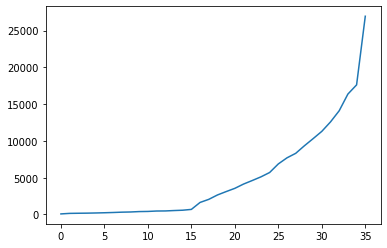

In [32]:
plt.plot(totalpositivecases_list)

In [33]:
date_split_icmr = []
for i in report_date_list:
    i_split = i[:2]
    date_split_icmr.append(i_split)

### Future Prediction using ICMR Data

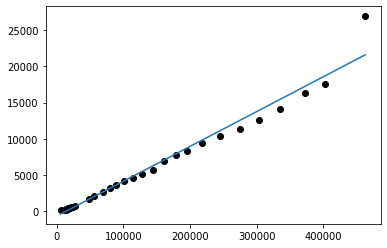

In [34]:
from scipy.optimize import curve_fit

def func(x,a,b):
    return a*x+b

init_guess = [1,1]
popt, pcov = curve_fit(func, totalsamplestested_list, totalpositivecases_list, init_guess)
a = popt[0]
b = popt[1]

m=len(totalsamplestested_list)
theta_0=np.multiply(b, np.ones(m))
theta_1=np.multiply(a,np.ones(m))
hypothesis=np.add(np.multiply(totalsamplestested_list, theta_1),theta_0)

plt.scatter(totalsamplestested_list, totalpositivecases_list, color='black')
plt.plot(totalsamplestested_list, hypothesis)

In [35]:
location = ['USA', 'Italy', 'Germany', 'South Korea']
test_world = [4003551, 1398024, 1728357, 563035]
conf_world = [799515, 181228, 147062, 10683]

In [36]:
y_pred = []
for items in test_world:
    pred = a*items + b
    y_pred.append(pred)

In [37]:
y_pred = np.array(y_pred, dtype=int)
y_pred

array([192524,  66758,  82703,  26454])

In [38]:
usa_vs_india_loc = ['USA', 'India']
usa_vs_india_conf = [conf_world[0], y_pred[0]]

italy_vs_india_loc = ['Italy', 'India']
italy_vs_india_conf = [conf_world[1], y_pred[1]]

germany_vs_india_loc = ['Germany', 'India']
germany_vs_india_conf = [conf_world[2], y_pred[2]]

sk_vs_india_loc = ['South Korea', 'India']
sk_vs_india_conf = [conf_world[3], y_pred[3]]

# Resources

In [39]:
api_url_resources = 'https://api.covid19india.org/resources/resources.json'
r_resources_ = requests.get(api_url_resources)
resources = r_resources_.json()

In [40]:
resource_list = resources.get('resources')

In [41]:
covid_labs = []
i = 0
for i in range(len(resource_list)):
    if resource_list[i].get('category') == 'CoVID-19 Testing Lab':
        covid_labs.append(resource_list[i])

In [42]:
state_list_lab = []
city_list = []
nameoftheorganisation_list = []
phonenumber_list = []
contact_list = []
descriptionandorserviceprovided_list = []

i = 0 
for i in range(len(covid_labs)):
    state = covid_labs[i].get('state')
    state_list_lab.append(state)
    
    city = covid_labs[i].get('city')
    city_list.append(city)
    
    nameoftheorganisation = covid_labs[i].get('nameoftheorganisation')
    nameoftheorganisation_list.append(nameoftheorganisation)
    
    contact = covid_labs[i].get('contact')
    contact_list.append(contact)

In [43]:
test_lab = {'State':state_list_lab, 'City':city_list, 'Organisation':nameoftheorganisation_list}
df_test_lab = pd.DataFrame(test_lab)
df_test_lab.to_csv('test_lab.csv')
df_test_lab.to_html('test_lab.html', border=0, index=False, justify = 'left', table_id = "resources_table")
df_test_lab

,State,City,Organisation
0,Andaman & Nicobar,Port Blair,Regional Medical Research Centre (ICMR)
1,Andhra Pradesh,Kakinada,Rangaraya Medical College
2,Andhra Pradesh,Vijayawada,Sidhartha Medical College
3,Assam,Dibrugarh,"Regional Medical Research Center, NE Region"
4,Assam,Guwahati,Gauhati Medical College
...,...,...,...
134,West Bengal,Siliguri,North Bengal Medical College
135,West Bengal,Kolkata,Institute of Post Graduate Medical Education &...
136,West Bengal,Kolkata,National Institute of Cholera & Enteric Diseases
137,West Bengal,Kolkata,Chittaranjan National Cancer Institute


# index.html

In [44]:
date_list_chart = []
totalconfirmed_list_chart = []
totalrecovered_list_chart = []
totaldeceased_list_chart = []
dailyconfirmed_list_chart = []
dailyrecovered_list_chart = []
dailydeceased_list_chart = []

i,j,k,l,m,n,o = 0,0,0,0,0,0,0

for i in date_list:
    date_list_chart.append(i)
    
for j in totalconfirmed_list:
    totalconfirmed_list_chart.append(j)

for k in totalrecovered_list:
    totalrecovered_list_chart.append(k)
    
for l in totaldeceased_list:
    totaldeceased_list_chart.append(l)
    
for m in dailyconfirmed_list:
    dailyconfirmed_list_chart.append(m)
    
for n in dailyrecovered_list:
    dailyrecovered_list_chart.append(n)
    
for o in dailydeceased_list:
    dailydeceased_list_chart.append(o)

In [45]:
now = datetime.now()
date = now.strftime("%d-%m-%Y")
date_time = now.strftime("%d-%m-%Y at %H:%M:%S")

index = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=0.77, shrink-to-fit=yes">
    <meta name="Description" content="Insights and Future Prediction of Covid-19 Pandemic in India">
    <meta http-equiv="Cache-Control" content="no-cache, no-store, must-revalidate" />
    <meta http-equiv="Pragma" content="no-cache" />
    <meta http-equiv="Expires" content="0" />
    <title>Insights of Covid-19 in India</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/twitter-bootstrap/4.4.1/css/bootstrap.min.css">
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.13.0/css/all.min.css">
    <link rel="stylesheet" href="https://cdn.datatables.net/v/bs4/dt-1.10.20/datatables.min.css">
    <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
    <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.3.1/jquery.min.js"></script>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.14.7/umd/popper.min.js"></script>
    <script src="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/js/bootstrap.min.js"></script>
    <style>
      @import url('https://fonts.googleapis.com/css?family=Roboto+Slab&display=swap');
      *{font-family: 'Roboto Slab', serif}
    </style>
</head>
<body>

<nav class="navbar bg-light navbar-expand-sm navbar-light sticky-top">
    <a class="navbar-brand" href="index.htm""><b>Insights of Covid-19</b> <i class="fas fa-virus"></i></a>
    <button class="navbar-toggler" type="button" data-toggle="collapse" data-target="#navbarSupportedContent">
        <span class="navbar-toggler-icon"></span>
    </button>
    <div class="collapse navbar-collapse" id="navbarSupportedContent">
        <ul class="navbar-nav ml-auto">
            <li class="nav-item active">
                <a class="nav-link" href="index.htm"><b>Home <i class="fas fa-home"></i></b></a>
            </li>
            <li class="nav-item">
                <a class="nav-link" href="trendAnalysis.htm"><b>Trend Analysis</b></a>
            </li>
            <li class="nav-item">
                <a class="nav-link" href="futurePrediction.htm"><b>Future Prediction</b></a>
            </li>
            <li class="nav-item">
                <a class="nav-link" href="helpfulResources.htm"><b>Helpful Resources</b></a>
            </li>
        </ul>
    </div>
</nav>

<div class="text-center">
    <p class="text-center text-danger">
        <br>
        Please refresh the page to see the latest information
    </p>
    <h1 class="text-center"><b>Insights of Covid-19 Pandemic in India</b></h1>
    <p class="text-center">
        Live information about Novel Corona Virus spread in India.
        <br>
        Check out the <a href="https://telegra.ph/Data-Sources-for-Covidtracker-indiaml-04-05" target="_blank" rel="noopener">data sources</a> for this website.
        <br>
        Last updated on """ + str(date_time) + """
        <br>
        <br>
        <br>
        <br>
    </p>
</div>

<div class="container">
    <div class="row justify-content-center">
        
        <div class="col-lg-4 col mb-3">
            <div class="card border-0">
                  <div class="text-primary">
                    <div class="card-body">
                      <h6 class="card-title"><b>Total <br> Confirmed</b></h6>
                      <h3 class="card-text"><b>""" + str(confirmed_list[0]) + """</b></h3>
                      <h6 class="card-text"> +""" + str(deltaconfirmed_list[0]) + """</h6>
                    </div>
                  </div>
            </div>
        </div>
    
        <div class="col-lg-8 col mb-3">
            <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
            <canvas id="myChart_3" width="400" height="100""></canvas>
            <script>
            var ctx_3 = document.getElementById('myChart_3').getContext('2d');
            var mixedChart_3 = new Chart(ctx_3, {
                type: 'line',
                data: {
                    datasets: [{
                        label: 'Daily Confirmations',
                        data: """ + str(dailyconfirmed_list_chart[-14:]) + """,
                        borderColor: "rgba(0,0,255,1)",
                        fill: false
                    }],
                    labels: """ + str(date_list_chart[-14:]) + """
                },
                options: {
                    scales: {
                        xAxes: [{
                            gridLines: {
                                drawOnChartArea: false
                            },
                            scaleLabel: {
                                display: true,
                                labelString: 'Time'
                        },
                            ticks: {
                                display: false
                            }
                        }],
                        yAxes: [{
                             gridLines: {
                                drawOnChartArea: false
                            },
                            ticks: {
                                display: false
                            }
                        }]
                    }
                }
            });
            </script>
        </div>
        
        <div class="col-lg-4 col mb-3">
            <div class="card border-0">
                  <div class="text-success">
                    <div class="card-body">
                      <h6 class="card-title"><b>Total <br> Recovered</b></h6>
                      <h3 class="card-text"><b>""" + str(recovered_list[0]) + """</b></h3>
                      <h6 class="card-text"> +""" + str(deltarecovered_list[0]) + """</h6>
                    </div>
                  </div>
            </div>
        </div>

        
        <div class="col-lg-8 col mb-3">
            <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
            <canvas id="myChart_31" width="400" height="100" "></canvas>
            <script>
            var ctx_31 = document.getElementById('myChart_31').getContext('2d');
            var mixedChart_31 = new Chart(ctx_31, {
                type: 'line',
                data: {
                    datasets: [{
                        label: 'Daily Recoveries',
                        data: """ + str(dailyrecovered_list_chart[-14:]) + """,
                        borderColor: "rgba(92,184,92,1)",
                        fill: false
                    }],
                    labels: """ + str(date_list_chart[-14:]) + """
                },
                options: {
                    scales: {
                        xAxes: [{
                            gridLines: {
                                drawOnChartArea: false
                            },
                            ticks: {
                                display: false
                            },
                            scaleLabel: {
                                display: true,
                                labelString: 'Time'
                        },
                        }],
                        yAxes: [{
                             gridLines: {
                                drawOnChartArea: false
                            },
                            ticks: {
                                display: false
                            },
                        }]
                    }
                }
            });
            </script>
        </div>
        
        <div class="col-lg-4 col mb-3">
            <div class="card border-0">
                  <div class="text-danger">
                    <div class="card-body">
                      <h6 class="card-title"><b>Total <br> Deceased</b></h6>
                      <h3 class="card-text"><b>""" + str(deaths_list[0]) + """</b></h3>
                      <h6 class="card-text"> +""" + str(deltadeaths_list[0]) + """</h6>
                    </div>
                  </div>
            </div>
        </div>
        
        <div class="col-lg-8 col mb-3">
            <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
            <canvas id="myChart_32" width="400" height="100" "></canvas>
            <script>
            var ctx_32 = document.getElementById('myChart_32').getContext('2d');
            var mixedChart_32 = new Chart(ctx_32, {
                type: 'line',
                data: {
                    datasets: [{
                        label: 'Daily Deaths',
                        data: """ + str(dailydeceased_list_chart[-14:]) + """,
                        borderColor: "rgba(255,0,0,1)",
                        fill: false
                    }],
                    labels: """ + str(date_list_chart[-14:]) + """
                },
                options: {
                    scales: {
                        xAxes: [{
                            gridLines: {
                                drawOnChartArea: false
                            },
                            ticks: {
                                display: false
                            },
                            scaleLabel: {
                                display: true,
                                labelString: 'Time'
                        },
                        }],
                        yAxes: [{
                             gridLines: {
                                drawOnChartArea: false
                            },
                            ticks: {
                                display: false
                            }
                        }]
                    }
                }
            });
            </script>
        </div>

        
    </div>
</div>

<br>
<br>

<div class="container">
    <div class="row justify-content-center">

        <div class="col-lg-6 col mb-3">
            <div class="card bg-success border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Recovery Rate</b></h4>
                      <p class="card-text"><b>""" + str(recovery_rate_list[0]) + '%' + """</b></p>
                    </div>
                  </div>
            </div>
        </div>


        <div class="col-lg-6 col mb-3">
            <div class="card bg-danger border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Death Rate</b></h4>
                      <p class="card-text"><b>""" + str(death_rate_list[0]) + '%' + """</b></p>
                    </div>
                  </div>
            </div>
        </div>
        
    </div>
</div>

<br>

<footer class="py-3">
    <div class="sticky-bottom">
        <div class="container">
            <div class="row justify-content-center">
                <p class="m-0 text-center text-dark">
                    Copyright <i class="fa fa-copyright"></i> 2020. Made with <i class="fa fa-heart"></i> by <a href="https://github.com/sudo-rajarshi" target="_blank" rel="noopener">Rajarshi Bhadra</a>
                </p>
            </div>
        </div>
    </div>
</footer>
</body>
</html>
"""

index_ = open("index.htm","w")
index_.write(index)
index_.close()


# trend.html

In [46]:
now = datetime.now()
date = now.strftime("%d-%m-%Y")
date_time = now.strftime("%d-%m-%Y at %H:%M:%S")

intro = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=0.77, shrink-to-fit=yes">
    <meta name="Description" content="Insights and Future Prediction of Covid-19 Pandemic in India">
    <meta http-equiv="Cache-Control" content="no-cache, no-store, must-revalidate" />
    <meta http-equiv="Pragma" content="no-cache" />
    <meta http-equiv="Expires" content="0" />
    <title>Insights of Covid'19 in India</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/twitter-bootstrap/4.4.1/css/bootstrap.min.css">
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.13.0/css/all.min.css">
    <link rel="stylesheet" href="https://cdn.datatables.net/v/bs4/dt-1.10.20/datatables.min.css">
    <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
    <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.3.1/jquery.min.js"></script>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.14.7/umd/popper.min.js"></script>
    <script src="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/js/bootstrap.min.js"></script>
    <style>
      @import url('https://fonts.googleapis.com/css?family=Roboto+Slab&display=swap');
      *{font-family: 'Roboto Slab', serif}
    </style>
</head>
<body>

<nav class="navbar bg-light navbar-expand-sm navbar-light sticky-top">
    <a class="navbar-brand" href="index.htm""><b>Insights of Covid-19</b> <i class="fas fa-virus"></i></a>
    <button class="navbar-toggler" type="button" data-toggle="collapse" data-target="#navbarSupportedContent">
        <span class="navbar-toggler-icon"></span>
    </button>
    <div class="collapse navbar-collapse" id="navbarSupportedContent">
        <ul class="navbar-nav ml-auto">
            <li class="nav-item">
                <a class="nav-link" href="index.htm"><b>Home</b></a>
            </li>
            <li class="nav-item active">
                <a class="nav-link" href="trendAnalysis.htm"><b>Trend Analysis <i class="fas fa-chart-line"></i></b></a>
            </li>
            <li class="nav-item">
                <a class="nav-link" href="futurePrediction.htm"><b>Future Prediction</b></a>
            </li>
            <li class="nav-item">
                <a class="nav-link" href="helpfulResources.htm"><b>Helpful Resources</b></a>
            </li>
        </ul>
    </div>
</nav>

<p class="text-center text-danger">
    <br>
    Please refresh the page to see the latest information
</p>

<p class="text-center">
    Last updated on """ + str(date_time) + """
</p>

<div class="container">
    <div class="row justify-content-center">
        <div class="col-lg-6 col mb-3">
            <div class="card border-0">
                  <div class="text-primary">
                    <div class="card-body">
                      <h2 class="card-title text-center"><b><a href="https://icmr.nic.in/node/39071" target="_blank" rel="noopener">Total Samples Tested</a></b></h2>
                      <p class="card-text text-center"><b> """ +str(totalsamplestested_list[-1]) + """</b></p>
                    </div>
                  </div>
            </div>
        </div>
    </div>
</div>


<div class="container">
    <div class="row justify-content-center">
    
        <div class="col-lg-3 col mb-3">
            <div class="card bg-primary border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Confirmed</b></h4>
                      <p class="card-text">""" + str(confirmed_list[0]) + ' (+' + str(deltaconfirmed_list[0]) + ')' + """</p>
                    </div>
                  </div>
            </div>
        </div>

        <div class="col-lg-3 col mb-3">
            <div class="card bg-danger border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Active</b></h4>
                      <p class="card-text">""" + str(active[0]) + """</p>
                    </div>
                  </div>
            </div>
        </div>

        <div class="col-lg-3 col mb-3">
            <div class="card bg-success border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Recovered</b></h4>
                      <p class="card-text">""" + str(recovered_list[0]) + ' (+' + str(deltarecovered_list[0]) + ')' + """</p>
                    </div>
                  </div>
            </div>
        </div>


        <div class="col-lg-3 col mb-3">
            <div class="card bg-secondary border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Deceased</b></h4>
                      <p class="card-text">""" + str(deaths_list[0]) + ' (+' + str(deltadeaths_list[0]) + ')' + """</p>
                    </div>
                  </div>
            </div>
        </div>
    </div>
</div>


<br>
<br>
<h3 class="text-center">
    <b>Analysing Corona Virus spread in Different States</b>
</h3>

<br>
<div class="text-center">
  <input type="text" name="" id="state_data_search" placeholder=" Search by State" onkeyup="search()">
</div>
<br>

<div class="container mb-3">
<div class="table-responsive">
"""

intro_ = open("trend_intro.html","w")
intro_.write(intro)
intro_.close()

In [47]:
confirmed_list_chart = []

i = 0
for i in confirmed_list:
    confirmed_list_chart.append(i)

In [48]:
chart_state = """
</div>
</div>

<div class="container">
    <div class="row justify-content-center">
        <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
        <canvas id="myChart"></canvas>
        <script>
        var ctx = document.getElementById('myChart').getContext('2d');
        var mixedChart = new Chart(ctx, {
            type: 'doughnut',
            options: {
                title: {
                    display: true,
                    text: 'Comparison of confirmations between top 10 states'
                },
            },
            data: {
                datasets: [{
                    label: 'Total Confirmations',
                    data: """ + str(confirmed_list_chart[1:11]) + """,
                    backgroundColor: [
                        'rgba(0, 0, 0, 0.5)',
                        'rgba(0, 0, 255, 0.5)',
                        'rgba(0, 255, 0, 0.5)',
                        'rgba(0, 255, 255, 0.5)',
                        'rgba(255, 0, 0, 0.5)',
                        'rgba(255, 255, 0, 0.5)',
                        'rgba(255, 0, 255, 0.5)',
                        'rgba(255, 200, 255, 0.5)',
                        'rgba(100, 100, 0, 0.5)',
                        'rgba(10, 0, 100, 0.5)',
                    ],
                }],
                labels: """ + str(state_list[1:11]) + """
            },
        });
        </script>
    </div>
</div>
"""

chart_state_ = open("chart_state.html","w")
chart_state_.write(chart_state)
chart_state_.close()

In [49]:
daily_data_intro = """
</div>
</div>

<script>
  const search = () =>{
    let filter = document.getElementById('state_data_search').value.toUpperCase();
    let resources_table = document.getElementById('state_data_table');
    let tr = resources_table.getElementsByTagName('tr');
    for(var i=0; i<tr.length; i++){
      let td = tr[i].getElementsByTagName('td')[0];
      if(td){
        let textvalue = td.textContent || td.innerHTML;
        if(textvalue.toUpperCase().indexOf(filter) > -1){
          tr[i].style.display = "";
        }
        else{
          tr[i].style.display = "none";
        }
        }
      }
    }
</script>

<br>
<br>

<h3 class="text-center">
    <b>Trend analysis of Corona Virus spread using the data of last 14 days</b>
</h3>

<div class="container mb-3">
<div class="table-responsive">
"""

daily_data_intro_ = open('daily_data_intro.html', 'w')
daily_data_intro_.write(daily_data_intro)
daily_data_intro_.close()


In [50]:
chart_total = """
</div>
</div>

<div class="container">
    <div class="row justify-content-center">
        <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
        <canvas id="myChart_3"></canvas>
        <script>
        var ctx_3 = document.getElementById('myChart_3').getContext('2d');
        var mixedChart_3 = new Chart(ctx_3, {
            type: 'line',
            data: {
                datasets: [{
                    label: 'Total Confirmations',
                    data: """ + str(totalconfirmed_list_chart[-day_range:]) + """,
                    borderColor: "rgba(0,0,255,1)",
                    fill: true
                }, {
                    label: 'Total Recoveries',
                    data: """ + str(totalrecovered_list_chart[-day_range:]) + """,
                    borderColor: "rgba(92,184,92,1)",
                    type: 'line',
                    fill: false,
                    order: 1
                }, {
                    label: 'Total Deaths',
                    data: """ + str(totaldeceased_list_chart[-day_range:]) + """,
                    backgroundColor: [
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                    ],
                    type: 'bar',
                    order: 2
                }],
                labels: """ + str(date_list_chart[-day_range:]) + """
            },
            options: {
                scales: {
                    xAxes: [{
                        gridLines: {
                            drawOnChartArea: false
                        }
                    }],
                    yAxes: [{
                         gridLines: {
                            drawOnChartArea: false
                        }
                    }]
                }
            }
        });
        </script>
    </div>
</div>
<br>
"""

chart_total_ = open("chart_total.html","w")
chart_total_.write(chart_total)
chart_total_.close()

In [51]:
chart_daily = """
<div class="container">
    <div class="row justify-content-center">
        <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
        <canvas id="myChart_2"></canvas>
        <script>
        var ctx_2 = document.getElementById('myChart_2').getContext('2d');
        var mixedChart_2 = new Chart(ctx_2, {
            type: 'line',
            data: {
                datasets: [{
                    label: 'Daily Confirmations',
                    data: """ + str(dailyconfirmed_list_chart[-day_range:]) + """,
                    borderColor: "rgba(0,0,255,1)",
                    fill: true
                }, {
                    label: 'Daily Recoveries',
                    data: """ + str(dailyrecovered_list_chart[-day_range:]) + """,
                    borderColor: "rgba(92,184,92,1)",
                    type: 'line',
                    fill: false,
                    order: 2
                }, {
                    label: 'Daily Deaths',
                    data: """ + str(dailydeceased_list_chart[-day_range:]) + """,
                    borderColor: "rgba(255,0,0,1)",
                    backgroundColor: [
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                        'rgba(255, 0, 0, 1)',
                    ],
                    type: 'bar',
                    order: 3
                }],
                labels: """ + str(date_list_chart[-day_range:]) + """
            },
            options: {
                scales: {
                    xAxes: [{
                        gridLines: {
                            drawOnChartArea: false
                        }
                    }],
                    yAxes: [{
                         gridLines: {
                            drawOnChartArea: false
                        }
                    }]
                }
            }
        });
        </script>
    </div>
</div>
"""

chart_daily_ = open("chart_daily.html","w")
chart_daily_.write(chart_daily)
chart_daily_.close()

In [52]:
ICMR_report_data_intro = """
<br>
<br>
<h3 class="text-center">
    <b>Trend Analysis using the test reports of last 14 days from ICMR</b>
</h3>

<div class="container mb-3">
<div class="table-responsive">
"""

ICMR_report_data_intro_ = open('ICMR_report_data_intro.html', 'w')
ICMR_report_data_intro_.write(ICMR_report_data_intro)
ICMR_report_data_intro_.close()

In [53]:
report_date_list_chart = []
totalsamplestested_list_chart = []
totalpositivecases_list_chart = []

i,j,k = 0,0,0

for i in report_date_list:
    i = i[:-5]
    report_date_list_chart.append(i)
    
for j in totalsamplestested_list:
    totalsamplestested_list_chart.append(j)
    
for k in totalpositivecases_list:
    totalpositivecases_list_chart.append(k)

In [54]:
icmr_stat_sample = """
</div>
</div>

<div class="container">
    <div class="row justify-content-center">
        <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
        <canvas id="myChart_1"></canvas>
        <script>
        var ctx_1 = document.getElementById('myChart_1').getContext('2d');
        var mixedChart_1 = new Chart(ctx_1, {
            type: 'line',
            data: {
                labels: """ + str(totalsamplestested_list_chart[-day_range:]) + """,
                datasets: [{
                    label: 'Total Confirmations',
                    data: """ + str(totalpositivecases_list_chart[-day_range:]) + """,
                    borderColor: "rgba(255,0,0,1)",
                    fill: true
                }]
            },
            options: {
                scales: {
                    xAxes: [{
                        scaleLabel: {
                            display: true,
                            labelString: 'Total Sample tested'
                        },
                        gridLines: {
                            drawOnChartArea: false
                        }
                    }],
                    yAxes: [{
                         gridLines: {
                            drawOnChartArea: false
                        }
                    }]
                }
            }
            
        });
        </script>
    </div>
</div>
"""

icmr_stat_sample_ = open("icmr_stat_sample.html","w")
icmr_stat_sample_.write(icmr_stat_sample)
icmr_stat_sample_.close()

In [55]:
prediction_body = """
<br>
<br>
<h3 class="text-center">
    <b>Comparison with other countries</b>
</h3>

<div class="container">
    <div class="row justify-content-center">
        <p class="text-justify" >
          <ul>
            <li>
              <b>""" + str(location[0]) + """</b> has tested <b>""" + str(test_world[0]) + """</b> samples out of which <b>""" + str(conf_world[0]) + """</b> are confirmed. If the same numbers of samples are being tested in ICMR, <b>""" + str(y_pred[0]) + """</b> cases might be found confirmed.
            </li>

            <li>
              <b>""" + str(location[1]) + """</b> has tested <b>""" + str(test_world[1]) + """</b> samples out of which <b>""" + str(conf_world[1]) + """</b> are confirmed. If the same numbers of samples are being tested in ICMR, <b>""" + str(y_pred[1]) + """</b> cases might be found confirmed.
            </li>

            <li>
              <b>""" + str(location[2]) + """</b> has tested <b>""" + str(test_world[2]) + """</b> samples out of which <b>""" + str(conf_world[2]) + """</b> are confirmed. If the same numbers of samples are being tested in ICMR, <b>""" + str(y_pred[2]) + """</b> cases might be found confirmed.
            </li>

            <li>
              <b>""" + str(location[3]) + """</b> has tested <b>""" + str(test_world[3]) + """</b> samples out of which <b>""" + str(conf_world[3]) + """</b> are confirmed. If the same numbers of samples are being tested in ICMR, <b>""" + str(y_pred[3]) + """</b> cases might be found confirmed.
            </li>
          </ul>
        </p>
    </div>
</div>
"""

prediction_body_ = open("prediction_body.html","w")
prediction_body_.write(prediction_body)
prediction_body_.close()

In [56]:
footer = """
<footer class="py-3">
    <div class="sticky-bottom">
        <div class="container">
            <div class="row justify-content-center">
                <p class="m-0 text-center text-dark">
                    Copyright <i class="fa fa-copyright"></i> 2020. Made with <i class="fa fa-heart"></i> by <a href="https://github.com/sudo-rajarshi" target="_blank">Rajarshi Bhadra</a>
                </p>
            </div>
        </div>
    </div>
</footer>
</body>
</html>
"""

footer_ = open("footer.html","w")
footer_.write(footer)
footer_.close()

In [57]:
with open('trend_intro.html') as rd: 
    intro = rd.read()
    
with open('State_data.html') as rd:
    state_wise = rd.read()
    state_wise = state_wise[:25] + "table table-striped table-bordered table-sm text-left " + state_wise[:35] + str(' align="left"') + state_wise[35:]
    state_wise = state_wise[:159] + ' class="thead-dark"' + state_wise[159:]
    
with open('daily_data_intro.html') as rd: 
    daily_intro = rd.read()
    
with open('daily_data.html') as rd: 
    daily = rd.read()
    daily = daily[:25] + "table table-striped table-bordered table-sm text-left " + daily[:35] + str(' align="left"') + daily[35:]
    daily = daily[:137] + ' class="thead-dark"' + daily[137:]
    
with open('chart_total.html') as rd: 
    line_chart_total = rd.read()
    
with open('chart_daily.html') as rd: 
    line_chart_daily = rd.read()
    
with open('ICMR_report_data_intro.html') as rd: 
    ICMR_intro = rd.read() 

with open('ICMR_report_data.html') as rd:
    ICMR = rd.read()
    ICMR = ICMR[:25] + "table table-striped table-bordered table-sm text-center " + ICMR[:35] + str(' align="center"') + ICMR[35:]
    ICMR = ICMR[:141] + ' class="thead-dark"' + ICMR[141:]
    
with open('icmr_stat_sample.html') as rd: 
    line_chart_ICMR = rd.read()
    
with open('prediction_body.html') as rd: 
    prediction = rd.read()
    
with open('footer.html') as rd: 
    footer = rd.read()
    
data = intro + state_wise + daily_intro + daily + line_chart_total + line_chart_daily + ICMR_intro + ICMR + line_chart_ICMR + footer

with open ('trendAnalysis.htm', 'w') as fp: 
    fp.write(data) 

# future_prediction.html

In [58]:
now = datetime.now()
date = now.strftime("%d-%m-%Y")
date_time = now.strftime("%d-%m-%Y at %H:%M:%S")

future_intro = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=0.77, shrink-to-fit=yes">
    <meta name="Description" content="Insights and Future Prediction of Covid-19 Pandemic in India">
    <meta http-equiv="Cache-Control" content="no-cache, no-store, must-revalidate" />
    <meta http-equiv="Pragma" content="no-cache" />
    <meta http-equiv="Expires" content="0" />
    <title>Insights of Covid'19 in India</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/twitter-bootstrap/4.4.1/css/bootstrap.min.css">
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.13.0/css/all.min.css">
    <link rel="stylesheet" href="https://cdn.datatables.net/v/bs4/dt-1.10.20/datatables.min.css">
    <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
    <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.3.1/jquery.min.js"></script>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.14.7/umd/popper.min.js"></script>
    <script src="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/js/bootstrap.min.js"></script>
    <style>
      @import url('https://fonts.googleapis.com/css?family=Roboto+Slab&display=swap');
      *{font-family: 'Roboto Slab', serif}
    </style>
</head>
<body>

<nav class="navbar bg-light navbar-expand-sm navbar-light sticky-top">
    <a class="navbar-brand" href="index.htm""><b>Insights of Covid-19</b> <i class="fas fa-virus"></i></a>
    <button class="navbar-toggler" type="button" data-toggle="collapse" data-target="#navbarSupportedContent">
        <span class="navbar-toggler-icon"></span>
    </button>
    <div class="collapse navbar-collapse" id="navbarSupportedContent">
        <ul class="navbar-nav ml-auto">
            <li class="nav-item">
                <a class="nav-link" href="index.htm"><b>Home</b></a>
            </li>
            <li class="nav-item">
                <a class="nav-link" href="trendAnalysis.htm"><b>Trend Analysis</b></a>
            </li>
            <li class="nav-item active">
                <a class="nav-link" href="futurePrediction.htm"><b>Future Prediction <i class="fas fa-brain"></i></b></a>
            </li>
            <li class="nav-item">
                <a class="nav-link" href="helpfulResources.htm"><b>Helpful Resources</b></a>
            </li>
        </ul>
    </div>
</nav>

<p class="text-center text-danger">
    <br>
    Please refresh the page to see the latest information
</p>


<h3 class="text-center">
    <b>Predictions for 24-04-2020</b>
</h3>
<p class="text-center">
    These predictions are made using Advanced State of the Art algorithms of Artificial Intelligence & Machine Learning
</p>
<br>

<div class="container">
    <div class="row justify-content-center">

        <div class="col-lg-3 col mb-3">
            <div class="card bg-primary border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Total <br> Confirmation</b></h4>
                      <p class="card-text">""" + str(pred_conf_lmin) + """</p>
                      </div>
                  </div>
            </div>
        </div>
        
        <div class="col-lg-3 col mb-3">
            <div class="card bg-danger border-0">
                  <div class="text-white">
                    <div class="card-body">             
                      <h4 class="card-title"><b>Total <br> Active</b></h4>
                      <p class="card-text">""" + str(pred_act_lmin) + """</p>
                      </div>
                  </div>
            </div>
        </div>

        <div class="col-lg-3 col mb-3">
            <div class="card bg-success border-0">
                  <div class="text-white">
                    <div class="card-body">             
                      <h4 class="card-title"><b>Total <br> Recovery</b></h4>
                      <p class="card-text">""" + str(pred_rec_lmin) + """</p>
                      </div>
                  </div>
            </div>
        </div>

        <div class="col-lg-3 col mb-3">
            <div class="card bg-dark border-0">
                  <div class="text-white">
                    <div class="card-body">
                      <h4 class="card-title"><b>Total <br> Death</b></h4>
                      <p class="card-text">""" + str(pred_det_lmin) + """</p>
                    </div>
                  </div>
            </div>
        </div>
        
    </div>
</div>

<br>
<br>
<h3 class="text-center">
    <b>Comparison with other countries</b>
</h3>
<p class="text-center">
    Based on the test reports from ICMR we can predict our future and compare it with other countries.
</p>

<div class="container">
    <div class="row justify-content-center">
        <p class="text-center" > 
          <ul>
            <li>
              <b>""" + str(location[0]) + """</b> has tested <b>""" + str(test_world[0]) + """</b> samples out of which <b>""" + str(conf_world[0]) + """</b> are confirmed. If the same numbers of samples are being tested in ICMR, <b>""" + str(y_pred[0]) + """</b> cases might be found confirmed.
            </li>

            <li>
              <b>""" + str(location[1]) + """</b> has tested <b>""" + str(test_world[1]) + """</b> samples out of which <b>""" + str(conf_world[1]) + """</b> are confirmed. If the same numbers of samples are being tested in ICMR, <b>""" + str(y_pred[1]) + """</b> cases might be found confirmed.
            </li>

            <li>
              <b>""" + str(location[2]) + """</b> has tested <b>""" + str(test_world[2]) + """</b> samples out of which <b>""" + str(conf_world[2]) + """</b> are confirmed. If the same numbers of samples are being tested in ICMR, <b>""" + str(y_pred[2]) + """</b> cases might be found confirmed.
            </li>

            <li>
              <b>""" + str(location[3]) + """</b> has tested <b>""" + str(test_world[3]) + """</b> samples out of which <b>""" + str(conf_world[3]) + """</b> are confirmed. If the same numbers of samples are being tested in ICMR, <b>""" + str(y_pred[3]) + """</b> cases might be found confirmed.
            </li>
          </ul>
        </p>
    </div>
</div>

<div class="container">
    <div class="row justify-content-center">
    
        <div class="col-lg-6 col mb-3">
            <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
            <canvas id="myChart_321" width="400" height="200" "></canvas>
            <script>
            var ctx_321 = document.getElementById('myChart_321').getContext('2d');
            var mixedChart_321 = new Chart(ctx_321, {
                type: 'bar',
                data: {
                    datasets: [{
                        label: 'Confirmations',
                        data: """ + str(usa_vs_india_conf) + """,
                        backgroundColor: [
                        'rgba(255, 0, 0, 1)',
                        'rgba(0, 0, 255, 1)',
                    ],
                    }],
                    labels: """ + str(usa_vs_india_loc) + """
                },
                options: {
                    scales: {
                        xAxes: [{
                            scaleLabel: {
                                display: true,
                                labelString: ''
                            },
                            gridLines: {
                                drawOnChartArea: false
                            }
                        }],
                        yAxes: [{
                             gridLines: {
                                drawOnChartArea: false
                            },
                             ticks: {
                                display: true
                            }
                        }]
                    }
                }

            });
            </script>
        </div>
        
        <div class="col-lg-6 col mb-3">
            <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
            <canvas id="myChart_322" width="400" height="200" "></canvas>
            <script>
            var ctx_322 = document.getElementById('myChart_322').getContext('2d');
            var mixedChart_322 = new Chart(ctx_322, {
                type: 'bar',
                data: {
                    datasets: [{
                        label: 'Confirmations',
                        data: """ + str(germany_vs_india_conf) + """,
                        backgroundColor: [
                        'rgba(255, 0, 0, 1)',
                        'rgba(0, 0, 255, 1)',
                    ],
                    }],
                    labels: """ + str(germany_vs_india_loc) + """
                },
                options: {
                    scales: {
                        xAxes: [{
                            scaleLabel: {
                                display: true,
                                labelString: ''
                            },
                            gridLines: {
                                drawOnChartArea: false
                            }
                        }],
                        yAxes: [{
                             gridLines: {
                                drawOnChartArea: false
                            },
                             ticks: {
                                display: true
                            }
                        }]
                    }
                }

            });
            </script>
        </div>
        
        <div class="col-lg-6 col mb-3">
            <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
            <canvas id="myChart_323" width="400" height="200" "></canvas>
            <script>
            var ctx_323 = document.getElementById('myChart_323').getContext('2d');
            var mixedChart_323 = new Chart(ctx_323, {
                type: 'bar',
                data: {
                    datasets: [{
                        label: 'Confirmations',
                        data: """ + str(italy_vs_india_conf) + """,
                        backgroundColor: [
                        'rgba(255, 0, 0, 1)',
                        'rgba(0, 0, 255, 1)',
                    ],
                    }],
                    labels: """ + str(italy_vs_india_loc) + """
                },
                options: {
                    scales: {
                        xAxes: [{
                            scaleLabel: {
                                display: true,
                                labelString: ''
                            },
                            gridLines: {
                                drawOnChartArea: false
                            }
                        }],
                        yAxes: [{
                             gridLines: {
                                drawOnChartArea: false
                            },
                             ticks: {
                                display: true
                            }
                        }]
                    }
                }

            });
            </script>
        </div>

        <div class="col-lg-6 col mb-3">
            <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
            <canvas id="myChart_324" width="400" height="200" "></canvas>
            <script>
            var ctx_324 = document.getElementById('myChart_324').getContext('2d');
            var mixedChart_324 = new Chart(ctx_324, {
                type: 'bar',
                data: {
                    datasets: [{
                        label: 'Confirmations',
                        data: """ + str(sk_vs_india_conf) + """,
                        backgroundColor: [
                        'rgba(255, 0, 0, 1)',
                        'rgba(0, 0, 255, 1)',
                    ],
                    }],
                    labels: """ + str(sk_vs_india_loc) + """
                },
                options: {
                    scales: {
                        xAxes: [{
                            scaleLabel: {
                                display: true,
                                labelString: ''
                            },
                            gridLines: {
                                drawOnChartArea: false
                            }
                        }],
                        yAxes: [{
                             gridLines: {
                                drawOnChartArea: false
                            },
                             ticks: {
                                display: true
                            }
                        }]
                    }
                }

            });
            </script>
        </div>

        
    </div>
</div>


<footer class="py-3">
    <div class="sticky-bottom">
        <div class="container">
            <div class="row justify-content-center">
                <p class="m-0 text-center text-dark">
                    Copyright <i class="fa fa-copyright"></i> 2020. Made with <i class="fa fa-heart"></i> by <a href="https://github.com/sudo-rajarshi" target="_blank" rel="noopener">Rajarshi Bhadra</a>
                </p>
            </div>
        </div>
    </div>
</footer>
</body>
</html>
"""

future_intro_ = open("futurePrediction.htm","w")
future_intro_.write(future_intro)
future_intro_.close()

# resources.html

In [59]:
test_lab_intro = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=0.77, shrink-to-fit=yes">
    <meta name="Description" content="Insights and Future Prediction of Covid-19 Pandemic in India">
    <meta http-equiv="Cache-Control" content="no-cache, no-store, must-revalidate" />
    <meta http-equiv="Pragma" content="no-cache" />
    <meta http-equiv="Expires" content="0" />
    <title>Insights of Covid'19 in India</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/twitter-bootstrap/4.4.1/css/bootstrap.min.css">
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.13.0/css/all.min.css">
    <link rel="stylesheet" href="https://cdn.datatables.net/v/bs4/dt-1.10.20/datatables.min.css">
    <script src="https://cdn.jsdelivr.net/npm/chart.js@2.9.3/dist/Chart.min.js"></script>
    <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.3.1/jquery.min.js"></script>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.14.7/umd/popper.min.js"></script>
    <script src="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/js/bootstrap.min.js"></script>
    <style>
      @import url('https://fonts.googleapis.com/css?family=Roboto+Slab&display=swap');
      *{font-family: 'Roboto Slab', serif}
    </style>
</head>
<body>

<nav class="navbar bg-light navbar-expand-sm navbar-light sticky-top">
    <a class="navbar-brand" href="index.htm""><b>Insights of Covid-19</b> <i class="fas fa-virus"></i></a>
    <button class="navbar-toggler" type="button" data-toggle="collapse" data-target="#navbarSupportedContent">
        <span class="navbar-toggler-icon"></span>
    </button>
    <div class="collapse navbar-collapse" id="navbarSupportedContent">
        <ul class="navbar-nav ml-auto">
            <li class="nav-item">
                <a class="nav-link" href="index.htm"><b>Home</b></a>
            </li>
            <li class="nav-item">
                <a class="nav-link" href="trendAnalysis.htm"><b>Trend Analysis</b></a>
            </li>
            <li class="nav-item">
                <a class="nav-link" href="futurePrediction.htm"><b>Future Prediction</b></a>
            </li>
            <li class="nav-item active">
                <a class="nav-link" href="helpfulResources.htm"><b>Helpful Resources <i class="fas fa-hospital-symbol"></i></b></a>
            </li>
        </ul>
    </div>
</nav>

<p class="text-center text-danger">
    <br>
    Please refresh the page to see the latest information
</p>


<h2 class="text-center">
    <b>Covid Testing Centers</b>
</h2>

<br>
<div class="text-center">
  <input type="text" name="" id="resources_search" placeholder=" Search by State" onkeyup="search()">
</div>
<br>

<div class="container mb-3">
<div class="table-responsive">
"""

test_lab_intro_ = open("test_lab_intro.html","w")
test_lab_intro_.write(test_lab_intro)
test_lab_intro_.close()


In [60]:
footer_lab = """
</div>
</div>

<script>
  const search = () =>{
    let filter = document.getElementById('resources_search').value.toUpperCase();
    let resources_table = document.getElementById('resources_table');
    let tr = resources_table.getElementsByTagName('tr');
    for(var i=0; i<tr.length; i++){
      let td = tr[i].getElementsByTagName('td')[0];
      if(td){
        let textvalue = td.textContent || td.innerHTML;
        if(textvalue.toUpperCase().indexOf(filter) > -1){
          tr[i].style.display = "";
        }
        else{
          tr[i].style.display = "none";
        }
        }
      }
    }
</script>

<br>

<footer class="py-3">
    <div class="sticky-bottom">
        <div class="container">
            <div class="row justify-content-center">
                <p class="m-0 text-center text-dark">
                    Copyright <i class="fa fa-copyright"></i> 2020. Made with <i class="fa fa-heart"></i> by <a href="https://github.com/sudo-rajarshi" target="_blank" rel="noopener">Rajarshi Bhadra</a>
                </p>
            </div>
        </div>
    </div>
</footer>
</body>
</html>
"""

footer_lab_ = open("footer_lab.html","w")
footer_lab_.write(footer_lab)
footer_lab_.close()

In [61]:
with open('test_lab_intro.html') as rd: 
    test_lab_intro = rd.read()

with open('test_lab.html') as rd: 
    test_lab = rd.read()
    test_lab = test_lab[:25] + "table table-striped table-bordered table-sm text-left " + test_lab[:35] + str(' align="left"') + test_lab[35:]
    test_lab = test_lab[:158] + ' class="thead-dark"' + test_lab[158:]
    
with open('footer_lab.html') as rd: 
    footer_lab = rd.read()
    
data_res = test_lab_intro + test_lab + footer_lab

with open ('helpfulResources.htm', 'w') as fp: 
    fp.write(data_res) 

# Check for Errors:

### Confirmation of State data and Total Data

In [62]:
# Confirmed
if np.sum(confirmed_list[1:]) == np.sum(confirmed_list[0]):
    print(True)
else:
    print(np.sum(confirmed_list[1:]))
    print(np.sum(confirmed_list[0]))

# Active
if np.sum(active[1:]) == np.sum(active[0]):
    print(True)
else:
    print(np.sum(active[1:]))
    print(np.sum(active[0]))

# Recovered
if np.sum(recovered_list[1:]) == np.sum(recovered_list[0]):
    print(True)
else:
    print(np.sum(recovered_list[1:]))
    print(np.sum(recovered_list[0]))    

# Death
if np.sum(deaths_list[1:]) == np.sum(deaths_list[0]):
    print(True)
else:
    print(np.sum(deaths_list[1:]))
    print(np.sum(deaths_list[0]))    

True
True
True
True


### Confirmation Check bewtween State Data, Total Data & Daily Data

In [63]:
# Confirmed
if totalconfirmed_list[-2] + dailyconfirmed_list[-1] == totalconfirmed_list[-1]:
    print(True)
else:
    print(totalconfirmed_list[-2] + dailyconfirmed_list[-1])
    print(totalconfirmed_list[-1])

# Recovered
if totalrecovered_list[-2] + dailyrecovered_list[-1] == totalrecovered_list[-1]:
    print(True)
else:
    print(totalrecovered_list[-2] + dailyrecovered_list[-1])
    print(totalrecovered_list[-1])


# Death
if totaldeceased_list[-2] + dailydeceased_list[-1] == totaldeceased_list[-1]:
    print(True)
else:
    print(totaldeceased_list[-2] + dailyconfirmed_list[-1])
    print(totaldeceased_list[-1])


True
True
True


In [64]:
ftp = ftplib.FTP('hostname')
ftp.login('username','password')
ftp.cwd('C')

file1 = open('PRED_REPORTS.csv','rb')

ftp.storlines('STOR PRED_REPORTS.csv', file1)

file1.close() 